In [342]:
import pandas as pd
import numpy as np
R1_data= pd.read_csv('R1_data.csv')
R1_data.columns=['Sen_2.5','Sen_10','Ref_2.5','Ref_10','Time','T','RH']
R1_data=R1_data.dropna()
Time=R1_data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
R1_data['Date'] = Date.tolist()
R1_data=R1_data.set_index('Date')
R1_data.drop('Time',axis = 1, inplace = True)
R1_data['Month']=R1_data.index.month
R1_data['Day_of_week']=R1_data.index.dayofweek
R1_data['Hour']=R1_data.index.hour
R1_data.head()

,Sen_2.5,Sen_10,Ref_2.5,Ref_10,T,RH,Month,Day_of_week,Hour
Date,,,,,,,,,
2019-10-02 11:57:33,112.477418,112.477418,18.58330,32.75481,26.378438,58.063437,10,2,11
2019-10-02 12:12:32,14.218595,58.035547,17.30462,31.54500,25.497143,48.609524,10,2,12
2019-10-02 12:17:34,5.174785,22.242307,17.09769,31.13976,25.807733,48.275000,10,2,12
2019-10-02 12:22:28,4.945599,29.365024,17.06241,31.07447,26.123333,47.734643,10,2,12
2019-10-02 12:27:30,132.986920,133.789832,16.62954,30.29124,25.502791,59.868837,10,2,12


In [343]:
R1_data.shape

(34896, 9)

In [344]:
import pandas as pd
import numpy as np
N3_data= pd.read_csv('N3_data.csv')
N3_data.columns=['Sen_2.5','Sen_10','Ref_2.5','Ref_10','Time','T','RH']
N3_data=N3_data.dropna()
Time=N3_data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
N3_data['Date'] = Date.tolist()
N3_data=N3_data.set_index('Date')
N3_data.drop('Time',axis = 1, inplace = True)
N3_data['Month']=N3_data.index.month
N3_data['Day_of_week']=N3_data.index.dayofweek
N3_data['Hour']=N3_data.index.hour
N3_data.head()

,Sen_2.5,Sen_10,Ref_2.5,Ref_10,T,RH,Month,Day_of_week,Hour
Date,,,,,,,,,
2019-10-02 12:02:27,1.847114,6.241146,17.95153,32.19386,24.614167,63.383333,10,2,12
2019-10-02 12:07:29,14.098711,28.327135,17.44945,31.71897,25.040800,65.382000,10,2,12
2019-10-02 12:12:32,5.068198,7.505471,17.30462,31.54500,25.035000,54.825000,10,2,12
2019-10-02 12:17:34,3.829068,14.021578,17.09769,31.13976,25.114861,54.924661,10,2,12
2019-10-02 12:22:28,3.378485,17.141379,17.06241,31.07447,25.445921,54.380000,10,2,12


In [345]:
Sen=N3_data['Sen_10'].to_list()
Q1 = np.percentile(Sen, 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(Sen, 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

In [346]:
#N3_data=N3_data[N3_data['Sen_10'] <=300]
#N3_data.head()

In [347]:
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

Raw=N3_data['Sen_10'].to_list()
Ref=N3_data['Ref_10'].to_list()
RAW1=[]
REF1=[]
RAW2=[]
REF2=[]
for i in range(len(Raw)):
    if Raw[i]>=Ref[i]:
        RAW1.append(Raw[i])
        REF1.append(Ref[i])
    else:
        RAW2.append(Raw[i])
        REF2.append(Ref[i])
        

Sen=[]
for i in range(len(Raw)):
    if Raw[i]>=Ref[i]:
        Sen.append(Raw[i]-(np.mean(RAW1)-np.mean(REF1)))
    else:
        Sen.append(Raw[i]-(np.mean(RAW1)-np.mean(REF1)))

N3_data['Sen']=Sen

# RF

## PM2.5

## OPC

In [384]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=R1_data[['Sen_2.5','T','RH','Month','Day_of_week','Hour']]
y=R1_data['Ref_2.5']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2,shuffle=True)

In [349]:
X_train.shape

(34741, 6)

In [350]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators =500 ,min_samples_split=2,min_samples_leaf= 2,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=True)
  
  
# fit the regressor with x and y data
regressor=regressor.fit(X_train[['Sen_10']], y_train) 

In [351]:
pred = regressor.predict(X_test[['Sen_10']])
lab1=X_test['Sen_10'].to_list()
Pearson_1=round(np.corrcoef(y_test, lab1)[0, 1],2)
Pearson_2=round(np.corrcoef(y_test, pred)[0, 1],2)
R2_lab=round(sm.r2_score(y_test, lab1), 2)
R2_RF=round(sm.r2_score(y_test, pred), 2)
R2_lab,R2_RF

(-5.03, 0.2)

In [352]:
Pearson_1,Pearson_2

(0.16, 0.5)

In [353]:
max(lab1)

2949.193667

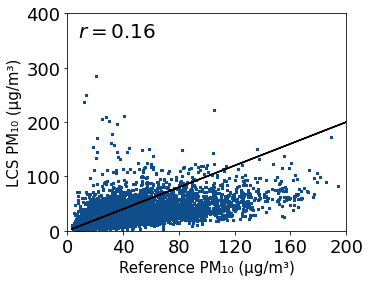

In [354]:
fig= plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),np.array(lab1),color='#104E8B',marker="$\\bigoplus$",s=5)
#plt.scatter(np.array(y_test),np.array(pred),color='teal',marker="$\\bigoplus$",s=10)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
plt.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
plt.ylabel('LCS PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
#plt.legend(['1:1','N3','RF'
            #], loc = 2, bbox_to_anchor = (0,1),fontsize=12)
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_1]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show
#plt.xticks(np.arange(0,2.9, step=1))
plt.xticks(np.arange(0,201, step=40))
plt.yticks(np.arange(0,501, step=100))
plt.xlim(0, 200)
plt.ylim(0, 400)
plt.show
textstr = r'$r=%.2f$' % (A[0],)
#textstr = '\n'.join(('LAB',r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

#place a text box in upper left in axes coords
ax.text(0.04, 0.96, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top')

plt.savefig("R1_10_OPC.pdf",format="pdf", bbox_inches="tight",dpi=1000)
#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [355]:
err=(np.array(lab1)-np.array(y_test))/np.array(y_test)
err1=[]
err2=[]
y_test1=[]
y_test2=[]
for i in range(len(err)):
    if err[i]>=-0.4 and err[i]<=0.4:
        err1.append(err[i])
        y_test1.append(y_test[i])
    else:
        err2.append(err[i])
        y_test2.append(y_test[i])
Err_lab=np.round((len(err1)/len(err))*100)

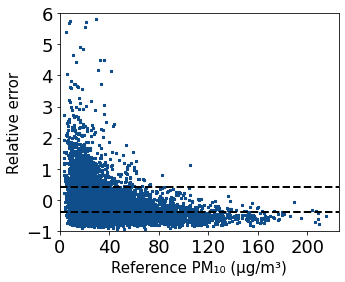

In [356]:
#err=(np.array(lab1)-np.array(y_test))/np.array(y_test)
fig= plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
#plt.scatter(np.array(y_test1),err1,color='teal',marker="$\\bigoplus$",s=5)
plt.scatter(np.array(y_test),err,color='#104E8B',marker="$\\bigoplus$",s=5)
#plt.scatter(np.array(y_test),np.array(pred),color='teal',marker="$\\bigoplus$",s=10)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
#plt.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
plt.ylabel('Relative error',fontsize=15)
#plt.legend(['1:1','N3','RF'
            #], loc = 2, bbox_to_anchor = (0,1),fontsize=12)
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_1]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show
#plt.xticks(np.arange(0,2.9, step=1))
plt.xticks(np.arange(0,201, step=40))
plt.yticks(np.arange(-1,7, step=1))
plt.ylim(-1, 6)
plt.axhline(y=-0.4, color='black', linestyle='--', linewidth=2)
plt.axhline(y=0.4, color='black', linestyle='--',linewidth=2)
#textstr = '\n'.join(('LAB',r'$r=%.2f$' % (A[0], ) ))

#props = dict(boxstyle='round', facecolor='white', alpha=1)

#place a text box in upper left in axes coords
#ax.text(0.04, 0.96, textstr, transform=ax.transAxes, fontsize=20,
        #verticalalignment='top', bbox=props)

plt.savefig("R1_10_OPC_err.pdf",format="pdf", bbox_inches="tight",dpi=1000)
#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
plt.show()

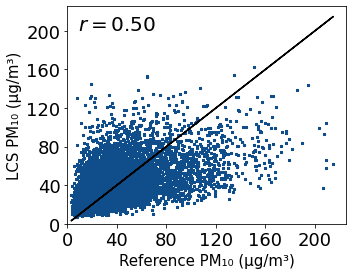

In [357]:
fig= plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
#plt.scatter(np.array(y_test),np.array(lab1),color='teal',marker="$\\bigoplus$",s=10)
plt.scatter(np.array(y_test),np.array(pred),color='#104E8B',marker="$\\bigoplus$",s=5)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
plt.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
plt.ylabel('LCS PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
#plt.legend(['1:1','N3','RF'
            #], loc = 2, bbox_to_anchor = (0,1),fontsize=12)
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_2]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show
#plt.xticks(np.arange(0,2.9, step=1))
plt.xticks(np.arange(0,201, step=40))
plt.yticks(np.arange(0,201, step=40))
plt.show
textstr = r'$r=%.2f$' % (A[0],)
#'\n'.join(('RF',r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

#place a text box in upper left in axes coords
ax.text(0.04, 0.96, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top')

plt.savefig("R1_10_RF_O.pdf",format="pdf", bbox_inches="tight")
#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
plt.show()

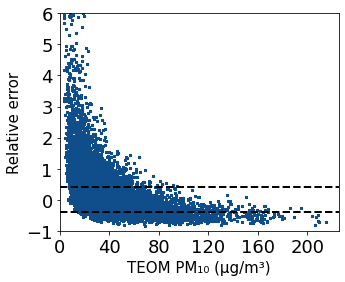

In [358]:
err=(np.array(pred)-np.array(y_test))/np.array(y_test)
fig= plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),err,color='#104E8B',marker="$\\bigoplus$",s=5)
#plt.scatter(np.array(y_test),np.array(pred),color='teal',marker="$\\bigoplus$",s=10)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
#plt.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('TEOM PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
plt.ylabel('Relative error',fontsize=15)
#plt.legend(['1:1','N3','RF'
            #], loc = 2, bbox_to_anchor = (0,1),fontsize=12)
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_1]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show
#plt.xticks(np.arange(0,2.9, step=1))
plt.xticks(np.arange(0,201, step=40))
plt.yticks(np.arange(-1,7, step=1))
plt.ylim(-1, 6)
plt.axhline(y=-0.4, color='black', linestyle='--', linewidth=2)
plt.axhline(y=0.4, color='black', linestyle='--',linewidth=2)
#textstr = '\n'.join(('LAB',r'$r=%.2f$' % (A[0], ) ))

#props = dict(boxstyle='round', facecolor='white', alpha=1)

#place a text box in upper left in axes coords
#ax.text(0.04, 0.96, textstr, transform=ax.transAxes, fontsize=20,
        #verticalalignment='top', bbox=props)

plt.savefig("R1_10_RF_O_err.pdf",format="pdf", bbox_inches="tight",dpi=1000)
#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
plt.show()

## OPC+T

In [359]:
regressor=regressor.fit(X_train[['Sen_10','T']], y_train)
pred = regressor.predict(X_test[['Sen_10','T']])
lab1=X_test['Sen_10'].to_list()
Pearson_1=round(np.corrcoef(y_test, lab1)[0, 1],2)
Pearson_2=round(np.corrcoef(y_test, pred)[0, 1],2)
R2_lab=round(sm.r2_score(y_test, lab1), 2)
R2_RF=round(sm.r2_score(y_test, pred), 2)
R2_lab,R2_RF

(-5.03, 0.36)

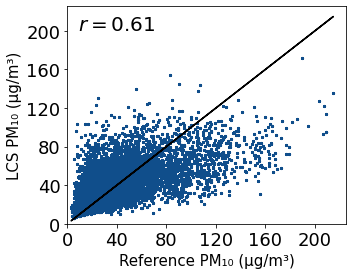

In [360]:
fig= plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
#plt.scatter(np.array(y_test),np.array(lab1),color='teal',marker="$\\bigoplus$",s=10)
plt.scatter(np.array(y_test),np.array(pred),color='#104E8B',marker="$\\bigoplus$",s=5)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
plt.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
plt.ylabel('LCS PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
#plt.legend(['1:1','N3','RF'
            #], loc = 2, bbox_to_anchor = (0,1),fontsize=12)
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_2]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show
#plt.xticks(np.arange(0,2.9, step=1))
plt.xticks(np.arange(0,201, step=40))
plt.yticks(np.arange(0,201, step=40))
plt.show
textstr = r'$r=%.2f$' % (A[0],)
#textstr = '\n'.join(('RF',r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

#place a text box in upper left in axes coords
ax.text(0.04, 0.96, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top')

plt.savefig("R1_10_RF_OT.pdf",format="pdf", bbox_inches="tight")
#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
plt.show()

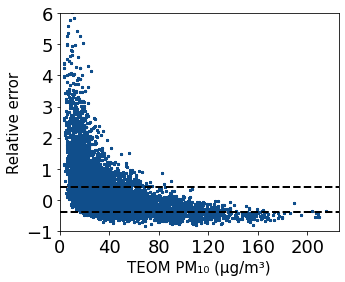

In [361]:
err=(np.array(pred)-np.array(y_test))/np.array(y_test)
fig= plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),err,color='#104E8B',marker="$\\bigoplus$",s=5)
#plt.scatter(np.array(y_test),np.array(pred),color='teal',marker="$\\bigoplus$",s=10)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
#plt.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('TEOM PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
plt.ylabel('Relative error',fontsize=15)
#plt.legend(['1:1','N3','RF'
            #], loc = 2, bbox_to_anchor = (0,1),fontsize=12)
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_1]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show
#plt.xticks(np.arange(0,2.9, step=1))
plt.xticks(np.arange(0,201, step=40))
plt.yticks(np.arange(-1,7, step=1))
plt.ylim(-1, 6)
plt.axhline(y=-0.4, color='black', linestyle='--', linewidth=2)
plt.axhline(y=0.4, color='black', linestyle='--',linewidth=2)
#textstr = '\n'.join(('LAB',r'$r=%.2f$' % (A[0], ) ))

#props = dict(boxstyle='round', facecolor='white', alpha=1)

#place a text box in upper left in axes coords
#ax.text(0.04, 0.96, textstr, transform=ax.transAxes, fontsize=20,
        #verticalalignment='top', bbox=props)

plt.savefig("R1_10_RF_OT_err.pdf",format="pdf", bbox_inches="tight",dpi=1000)
#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
plt.show()

## OPC+RH

In [362]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2,shuffle=True)
regressor=regressor.fit(X_train[['Sen_10','RH']], y_train)
pred = regressor.predict(X_test[['Sen_10','RH']])
lab1=X_test['Sen_10'].to_list()
Pearson_1=round(np.corrcoef(y_test, lab1)[0, 1],2)
Pearson_2=round(np.corrcoef(y_test, pred)[0, 1],2)
R2_lab=round(sm.r2_score(y_test, lab1), 2)
R2_RF=round(sm.r2_score(y_test, pred), 2)
R2_lab,R2_RF

(-21.47, 0.41)

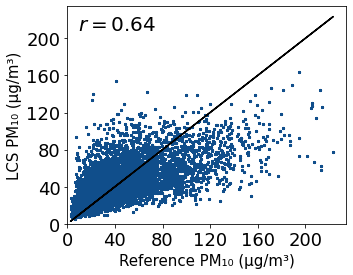

In [363]:
fig= plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
#plt.scatter(np.array(y_test),np.array(lab1),color='teal',marker="$\\bigoplus$",s=10)
plt.scatter(np.array(y_test),np.array(pred),color='#104E8B',marker="$\\bigoplus$",s=5)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
plt.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
plt.ylabel('LCS PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
#plt.legend(['1:1','N3','RF'
            #], loc = 2, bbox_to_anchor = (0,1),fontsize=12)
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_2]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show
#plt.xticks(np.arange(0,2.9, step=1))
plt.xticks(np.arange(0,201, step=40))
plt.yticks(np.arange(0,201, step=40))
plt.show
textstr = r'$r=%.2f$' % (A[0],)
#textstr = '\n'.join(('RF',r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

#place a text box in upper left in axes coords
ax.text(0.04, 0.96, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top')

plt.savefig("R1_10_RF_ORH.pdf",format="pdf", bbox_inches="tight")
#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
plt.show()

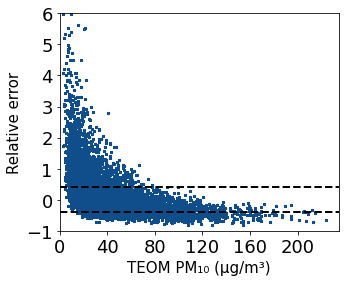

In [364]:
err=(np.array(pred)-np.array(y_test))/np.array(y_test)
fig= plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),err,color='#104E8B',marker="$\\bigoplus$",s=5)
#plt.scatter(np.array(y_test),np.array(pred),color='teal',marker="$\\bigoplus$",s=10)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
#plt.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('TEOM PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
plt.ylabel('Relative error',fontsize=15)
#plt.legend(['1:1','N3','RF'
            #], loc = 2, bbox_to_anchor = (0,1),fontsize=12)
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_1]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show
#plt.xticks(np.arange(0,2.9, step=1))
plt.xticks(np.arange(0,201, step=40))
plt.yticks(np.arange(-1,7, step=1))
plt.axhline(y=-0.4, color='black', linestyle='--', linewidth=2)
plt.axhline(y=0.4, color='black', linestyle='--',linewidth=2)
plt.ylim(-1, 6)
#textstr = '\n'.join(('LAB',r'$r=%.2f$' % (A[0], ) ))

#props = dict(boxstyle='round', facecolor='white', alpha=1)

#place a text box in upper left in axes coords
#ax.text(0.04, 0.96, textstr, transform=ax.transAxes, fontsize=20,
        #verticalalignment='top', bbox=props)

plt.savefig("R1_10_RF_ORH_err.pdf",format="pdf", bbox_inches="tight",dpi=1000)
#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
plt.show()

## OPC+T+RH

In [386]:
regressor=regressor.fit(X_train[['Sen_2.5','T','RH','Month','Day_of_week','Hour']], y_train)
pred = regressor.predict(X_test[['Sen_2.5','T','RH','Month','Day_of_week','Hour']])
lab1=X_test['Sen_2.5'].to_list()
Pearson_1=round(np.corrcoef(y_test, lab1)[0, 1],2)
Pearson_2=round(np.corrcoef(y_test, pred)[0, 1],2)
R2_lab=round(sm.r2_score(y_test, lab1), 2)
R2_RF=round(sm.r2_score(y_test, pred), 2)
R2_lab,R2_RF

(-0.09, 0.94)

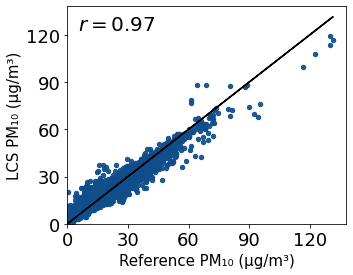

In [388]:
fig= plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
#plt.scatter(np.array(y_test),np.array(lab1),color='teal',marker="$\\bigoplus$",s=10)
plt.scatter(np.array(y_test),np.array(pred),color='#104E8B',marker="$\\bigoplus$",s=20, alpha=0.9)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
plt.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
plt.ylabel('LCS PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
#plt.legend(['1:1','N3','RF'
            #], loc = 2, bbox_to_anchor = (0,1),fontsize=12)
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_2]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show
#plt.xticks(np.arange(0,2.9, step=1))
plt.xticks(np.arange(0,121, step=30))
plt.yticks(np.arange(0,121, step=30))
plt.show
textstr = r'$r=%.2f$' % (0.97,)
#textstr = '\n'.join(('RF',r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

#place a text box in upper left in axes coords
ax.text(0.04, 0.96, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top')

plt.savefig("R1_2.5_RF_OTRH.pdf",format="pdf", bbox_inches="tight", dpi=1000)
#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [367]:
err=(np.array(pred)-np.array(y_test))/np.array(y_test)
err1=[]
err2=[]
y_test1=[]
y_test2=[]
for i in range(len(err)):
    if err[i]>=-0.4 and err[i]<=0.4:
        err1.append(err[i])
        y_test1.append(y_test[i])
    else:
        err2.append(err[i])
        y_test2.append(y_test[i])
Err_rf=np.round((len(err1)/len(err))*100)

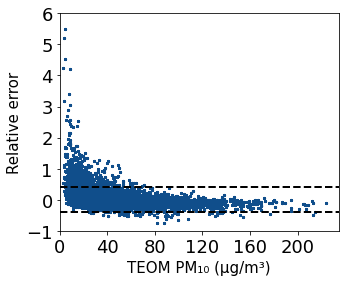

In [368]:
#err=(np.array(pred)-np.array(y_test))/np.array(y_test)
fig= plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),err,color='#104E8B',marker="$\\bigoplus$",s=5)
#plt.scatter(np.array(y_test),np.array(pred),color='teal',marker="$\\bigoplus$",s=10)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
#plt.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('TEOM PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
plt.ylabel('Relative error',fontsize=15)
#plt.legend(['1:1','N3','RF'
            #], loc = 2, bbox_to_anchor = (0,1),fontsize=12)
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_1]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show
#plt.xticks(np.arange(0,2.9, step=1))
plt.xticks(np.arange(0,201, step=40))
plt.yticks(np.arange(-1,7, step=1))
plt.ylim(-1, 6)
plt.axhline(y=-0.4, color='black', linestyle='--', linewidth=2)
plt.axhline(y=0.4, color='black', linestyle='--',linewidth=2)
#textstr = '\n'.join(('LAB',r'$r=%.2f$' % (A[0], ) ))

#props = dict(boxstyle='round', facecolor='white', alpha=1)

#place a text box in upper left in axes coords
#ax.text(0.04, 0.96, textstr, transform=ax.transAxes, fontsize=20,
        #verticalalignment='top', bbox=props)

plt.savefig("R1_10_RF_OTRH_err.pdf",format="pdf", bbox_inches="tight",dpi=1000)
#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [369]:
A1=R1_data['Sen_10'].to_list()
B1=R1_data['Ref_10'].to_list()
Pearson_1=round(np.corrcoef(y_test, lab1)[0, 1],2)
Pearson_2=round(np.corrcoef(A1, B1)[0, 1],2)

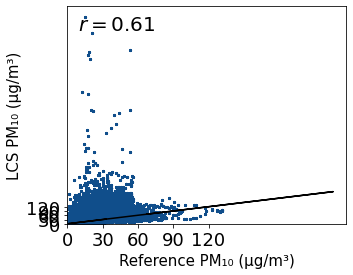

In [370]:
fig= plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
#plt.scatter(np.array(y_test),np.array(lab1),color='teal',marker="$\\bigoplus$",s=10)
plt.scatter(np.array(B),np.array(A1),color='#104E8B',marker="$\\bigoplus$",s=5, alpha=1)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
plt.plot(np.array(B1),np.array(B1), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
plt.ylabel('LCS PM10'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=15)
#plt.legend(['1:1','N3','RF'
            #], loc = 2, bbox_to_anchor = (0,1),fontsize=12)
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_2]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show
#plt.xticks(np.arange(0,2.9, step=1))
plt.xticks(np.arange(0,121, step=30))
plt.yticks(np.arange(0,121, step=30))
plt.show
textstr = r'$r=%.2f$' % (A[0],)
#textstr = '\n'.join(('',r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

#place a text box in upper left in axes coords
ax.text(0.04, 0.96, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top')

plt.savefig("R1_10_LAB.pdf",format="pdf", bbox_inches="tight")
#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Feature Importance

In [371]:
FI=regressor.feature_importances_
FI=np.round(FI*100)
FI

array([36., 13., 13., 10.,  7., 21.])

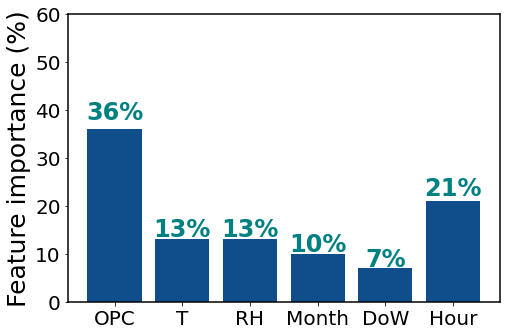

In [406]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['OPC', 'T', 'RH','Month','DoW','Hour']
students = [int(FI[0]),int(FI[1]),int(FI[2]),int(FI[3]),int(FI[4]),int(FI[5])]
graph=ax.bar(langs,students, color='#104E8B')
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.06,
             str(students[i])+'%',
             ha='center',
             weight='bold',fontsize=24, color='teal')
    i+=1
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.yticks(np.arange(0,61, step=10))
plt.ylabel('Feature importance (%)', fontsize=25)
plt.setp(ax.spines.values(), linewidth=1.5)
#plt.title(r"$O_3$",fontsize=18)
plt.savefig("R1_10_FI.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Points within error thresholds

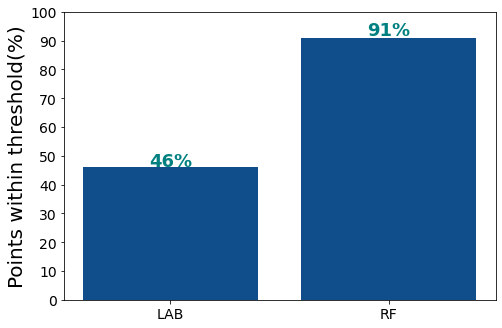

In [373]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['LAB', 'RF']
students = [int(Err_lab),int(Err_rf)]
graph=ax.bar(langs,students, color='#104E8B')
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(students[i])+'%',
             ha='center',
             weight='bold',fontsize=18, color='teal')
    i+=1
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,101, step=10))
plt.ylabel('Points within threshold(%)', fontsize=20)
#plt.title(r"$O_3$",fontsize=18)
plt.savefig("R1_10_ET.pdf", format="pdf", bbox_inches="tight")
plt.show()

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled, y_train, batch_size= 100, epochs=100, verbose= 0)

train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

In [374]:
subscript= str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

In [11]:
!pip install -U kaleido
import plotly.graph_objects as go
from functools import reduce
from itertools import product

z=[[0.12,0.23,0.51,0.64,0.61,0.62],
  [0.11,0.21,0.49,0.53,0.51,0.51],
  [0.61,0.64,0.62,0.74,0.7,0.69],
  [0.58,0.58,0.6,0.66,0.62,0.6]]
x=['<b>LAB</b>', '<b>LR</b>', '<b>SVR</b>', '<b>RF</b>', '<b>ANN</b>','<b>XGBoost</b>']
y=['<b>N3</b>'+ ' <b>PM10</b>','<b>N3</b>'+ ' <b>PM2.5</b>' , 
   '<b>R1</b>'+ ' <b>PM10</b>','<b>R1</b>'+ ' <b>PM2.5</b>']

def get_anno_text(z_value):
    annotations=[]
    a, b = len(z_value), len(z_value[0])
    flat_z = reduce(lambda x,y: x+y, z_value) # z_value.flat if you deal with numpy
    coords = product(range(a), range(b))
    for pos, elem in zip(coords, flat_z):
        annotations.append({'font': {'color': 'black'},
                    'showarrow': False,
                    'text': str(elem),
                    'x': pos[1],
                    'y': pos[0],
                        'font.size':22   })
    return annotations

fig = go.Figure(data=go.Heatmap(
                   z=z,
                   x=x,
                   y=y,
                   hoverongaps = True, colorscale ='Viridis',opacity=0.7))#matter#

fig.update_layout(title={'text': "",
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
           plot_bgcolor='rgba(0,0,0,0)',       
    annotations = get_anno_text(z),
                 width=1000,
height=400,xaxis={'side': 'top'})

fig.update_xaxes(tickfont = dict(size=16),linewidth=0.3, linecolor='black',
    
                 mirror=True)
fig.update_yaxes(tickfont = dict(size=16),linewidth=0.3, linecolor='black',
        
                 mirror=True)
fig.write_image("table1.pdf",engine="kaleido")
#plt.savefig("table2a.pdf", format="pdf", bbox_inches="tight")
fig.show()


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


In [12]:
import plotly.graph_objects as go
from functools import reduce
from itertools import product

z=[[0.12,0.59,0.69,0.96,0.75,0.87],
  [0.11,0.51,0.63,0.98,0.72,0.86],
  [0.61,0.76,0.79,0.97,0.79,0.9],
  [0.58,0.61,0.7,0.98,0.79,0.9]]
x=['<b>LAB</b>', '<b>LR</b>', '<b>SVR</b>', '<b>RF</b>', '<b>ANN</b>','<b>XGBoost</b>']
y=['<b>N3</b>'+ ' <b>PM10</b>','<b>N3</b>'+ ' <b>PM2.5</b>' , 
   '<b>R1</b>'+ ' <b>PM10</b>','<b>R1</b>'+ ' <b>PM2.5</b>']

def get_anno_text(z_value):
    annotations=[]
    a, b = len(z_value), len(z_value[0])
    flat_z = reduce(lambda x,y: x+y, z_value) # z_value.flat if you deal with numpy
    coords = product(range(a), range(b))
    for pos, elem in zip(coords, flat_z):
        annotations.append({'font': {'color': 'black'},
                    'showarrow': False,
                    'text': str(elem),
                    'x': pos[1],
                    'y': pos[0],
                        'font.size':22   })
    return annotations

fig = go.Figure(data=go.Heatmap(
                   z=z,
                   x=x,
                   y=y,
                   hoverongaps = True, colorscale ='Viridis',opacity=0.7))#matter#

fig.update_layout(title={'text': "",
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
           plot_bgcolor='rgba(0,0,0,0)',       
    annotations = get_anno_text(z),
                 width=1000,
height=400,xaxis={'side': 'top'})

fig.update_xaxes(tickfont = dict(size=16),linewidth=0.3, linecolor='black',
    
                 mirror=True)
fig.update_yaxes(tickfont = dict(size=16),linewidth=0.3, linecolor='black',
        
                 mirror=True)
fig.write_image("table2.pdf",engine="kaleido")
#plt.savefig("table2a.pdf", format="pdf", bbox_inches="tight")
fig.show()
